In [1]:
## set up environment
suppressMessages({
source("/camp/home/hungm/working/Matthew/library/R/functions/Seurat/processing.R")
source("/camp/home/hungm/working/Matthew/library/R/functions/Seurat/plotting.R")
source("/nemo/lab/caladod/working/Matthew/library/R/functions/Seurat/genedict.R")
setwd("/nemo/lab/caladod/working/Matthew/project/matthew/MH_GSE155224")})

## import seurat objects
obj <- qread( "seurat/20240826_GSE155224_qc.qs")

In [311]:
obj <- qread( "seurat/20240826_GSE155224_qc.qs")

## SCTransform, PCA, Integration

In [312]:
obj[["RNA"]] <- split(obj[["RNA"]], f = obj$samples)
obj

An object of class Seurat 
17895 features across 9803 samples within 5 assays 
Active assay: RNA (17437 features, 0 variable features)
 4 layers present: counts.filtered_matrix_1, counts.filtered_matrix_2, data.filtered_matrix_1, data.filtered_matrix_2
 4 other assays present: HTO, ADT, BCR, TCR
 3 dimensional reductions calculated: pca, harmony, umap

In [313]:
obj <- SCTransform(obj, vst.flavor = "v2", variable.features.n = 3000, assay = "RNA", return.only.var.genes = F, verbose = F, vars.to.regress = c("S.Score", "G2M.Score"))
obj <- RunPCA(obj, reduction.name = "pca", verbose = F)
obj <- RunHarmony(obj, reduction.use = "pca", group.by.vars = "samples", verbose = F)

Warning message:
“Adding more features than present in current data”
Warning message:
“Adding more features than present in current data”
Transposing data matrix



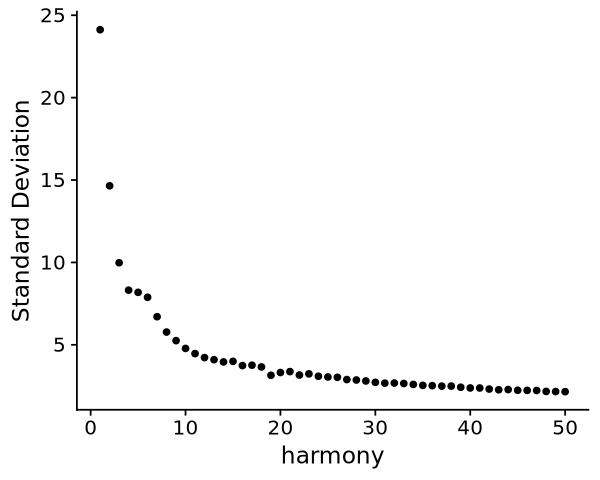

In [314]:
options(repr.plot.width=5, repr.plot.height=4)
ElbowPlot(obj, ndims = 50, reduction = "harmony")

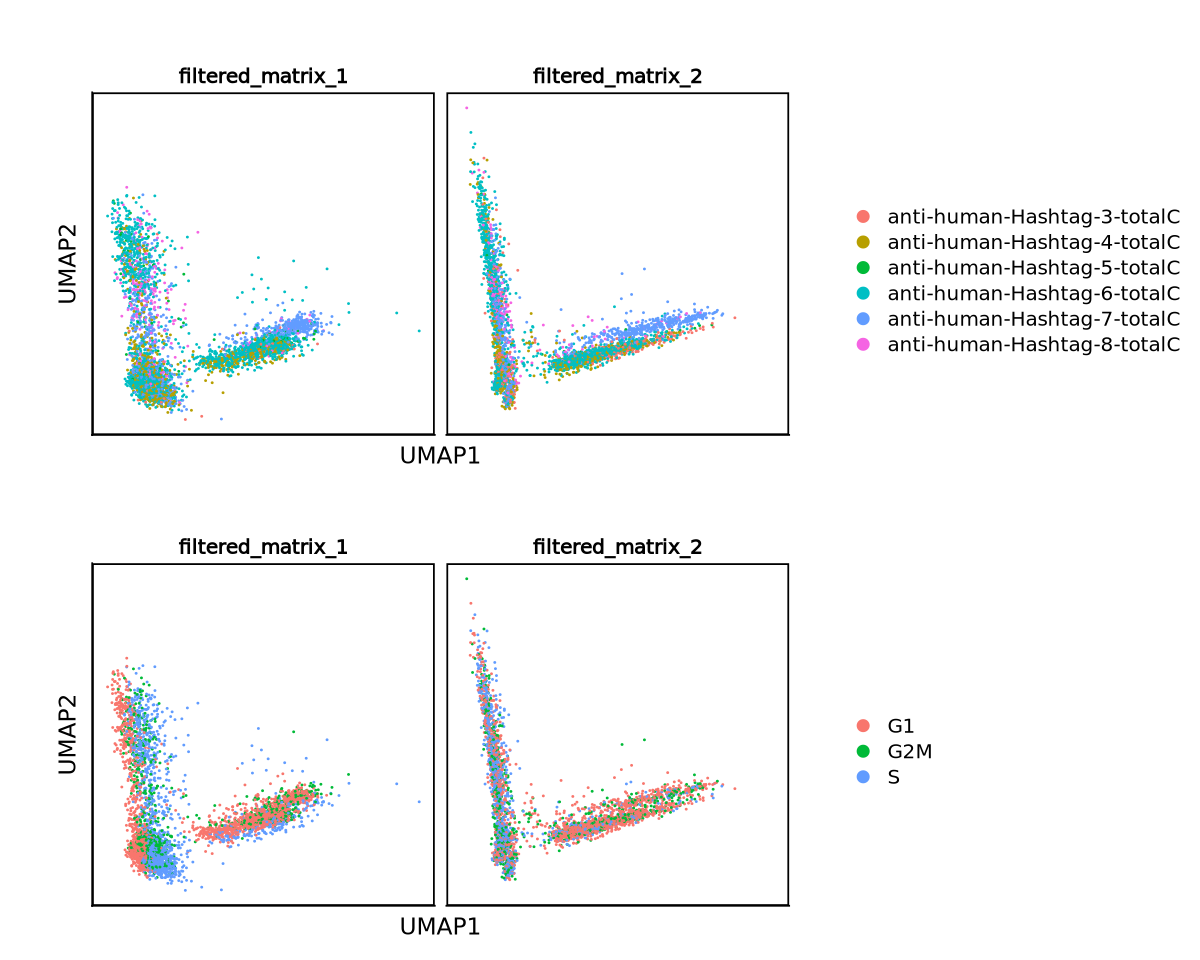

In [315]:
options(repr.plot.width=10, repr.plot.height=8)
p1 <- scUMAP(obj, reduction = "harmony", group.by = "MULTI_ID", split.by = "samples", shuffle = T)
p2 <- scUMAP(obj, reduction = "harmony", group.by = "Phase", split.by = "samples", shuffle = T)
p1/p2

In [316]:
obj <- RunUMAP(obj, dims = 1:10, reduction = "harmony", reduction.name = "umap", assay = "SCT", verbose = FALSE)

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



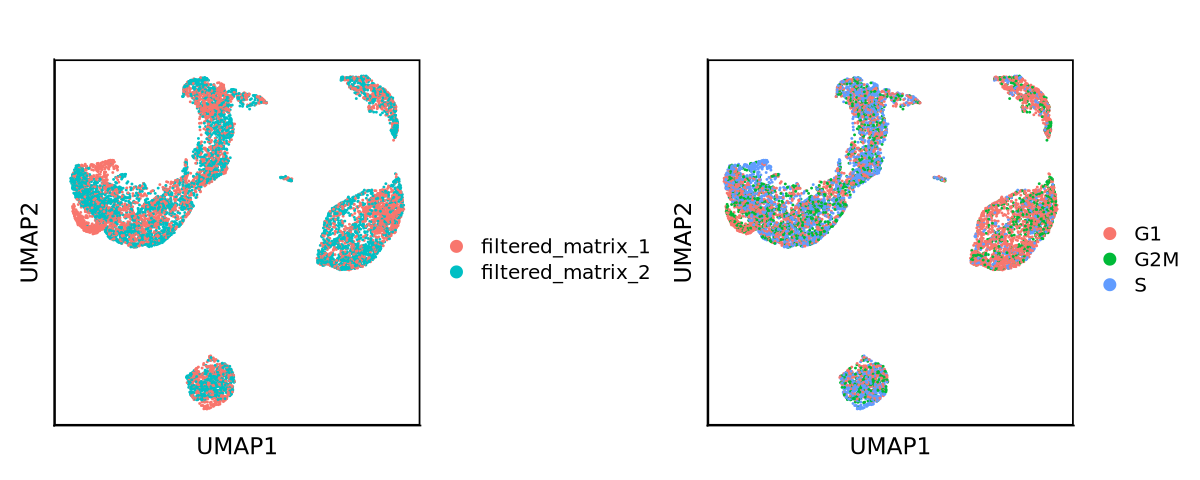

In [317]:
options(repr.plot.width=10, repr.plot.height=4)
p1 <- scUMAP(obj, reduction = "umap", group.by = "samples", shuffle = T)
p2 <- scUMAP(obj, reduction = "umap", group.by = "Phase")
p1 + p2

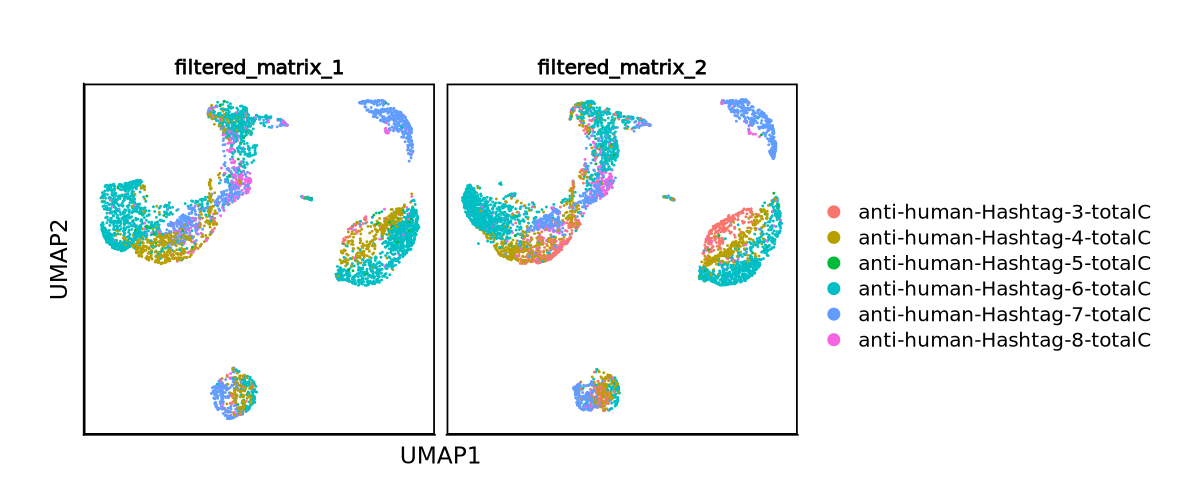

In [318]:
options(repr.plot.width=10, repr.plot.height=4)
p1 <- scUMAP(obj, reduction = "umap", group.by = "MULTI_ID", split.by = "samples", shuffle = T)
p1

## Regress Cell Cycle Scores

In [319]:
obj <- SCTransform(obj, vst.flavor = "v2", variable.features.n = 3000, assay = "RNA", return.only.var.genes = F, verbose = F, vars.to.regress = c("S.Score", "G2M.Score"))
obj <- RunPCA(obj, reduction.name = "pca", verbose = F)

Warning message:
“Adding more features than present in current data”
Warning message:
“Adding more features than present in current data”


## Adjust Harmony Integration

In [320]:
obj$harmony_correct <- paste0(obj$samples, "_", obj$MULTI_ID)
obj <- RunHarmony(obj, reduction.use = "pca", group.by.vars = "harmony_correct", verbose = F)

Transposing data matrix



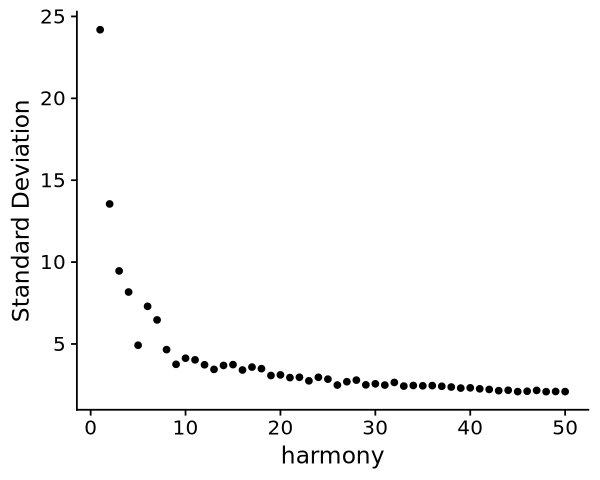

In [321]:
options(repr.plot.width=5, repr.plot.height=4)
ElbowPlot(obj, ndims = 50, reduction = "harmony")

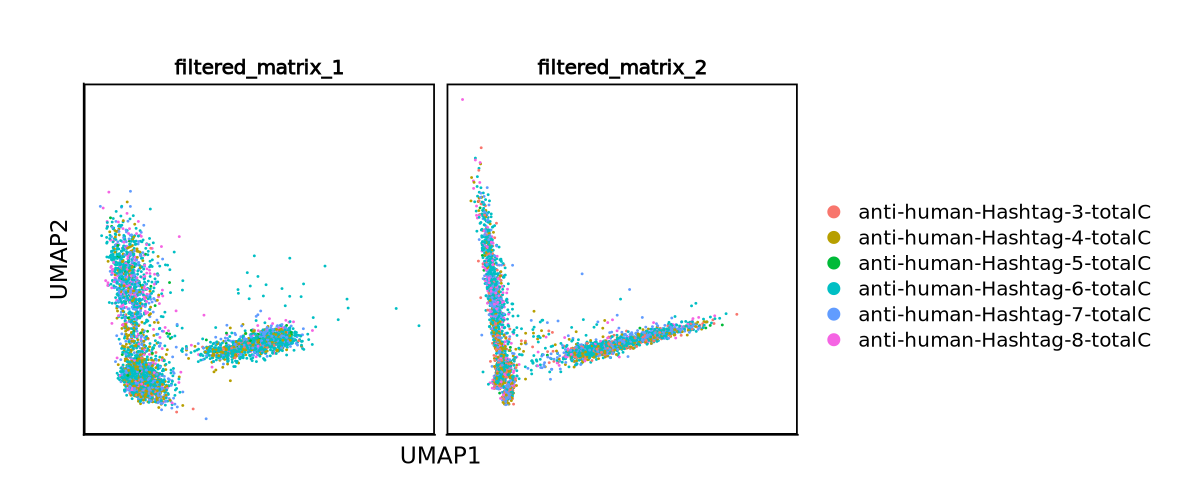

In [322]:
options(repr.plot.width=10, repr.plot.height=4)
p1 <- scUMAP(obj, reduction = "harmony", group.by = "MULTI_ID", split.by = "samples", shuffle = T)
p1

In [323]:
obj <- RunUMAP(obj, dims = 1:10, reduction = "harmony", reduction.name = "umap", assay = "SCT", verbose = FALSE)

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



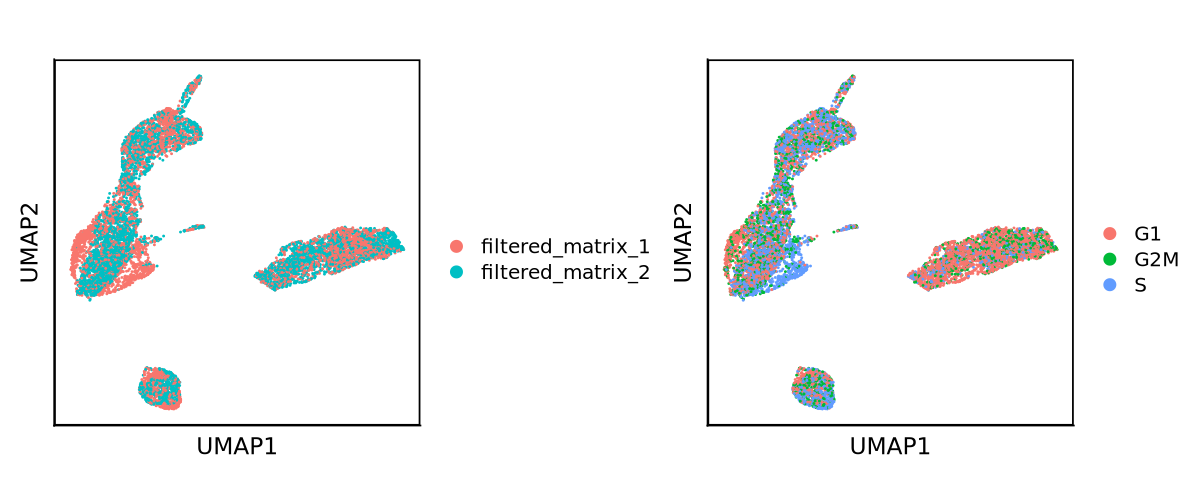

In [324]:
options(repr.plot.width=10, repr.plot.height=4)
p1 <- scUMAP(obj, reduction = "umap", group.by = "samples", shuffle = T)
p2 <- scUMAP(obj, reduction = "umap", group.by = "Phase")
p1 + p2

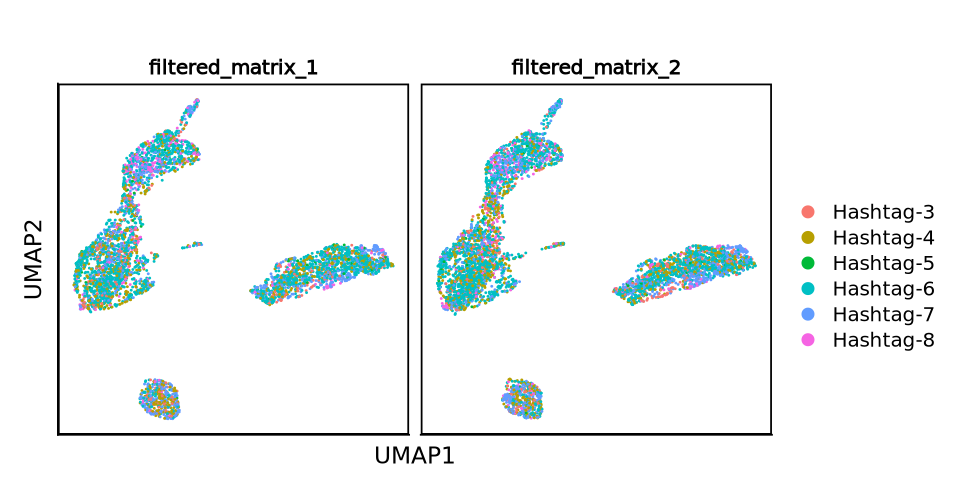

In [353]:
options(repr.plot.width=8, repr.plot.height=4)
obj$MULTI_ID <- gsub(".*Hash", "Hash", obj$MULTI_ID)
obj$MULTI_ID <- gsub("-total.*", "", obj$MULTI_ID)
p1 <- scUMAP(obj, reduction = "umap", group.by = "MULTI_ID", split.by = "samples", shuffle = T)
p1

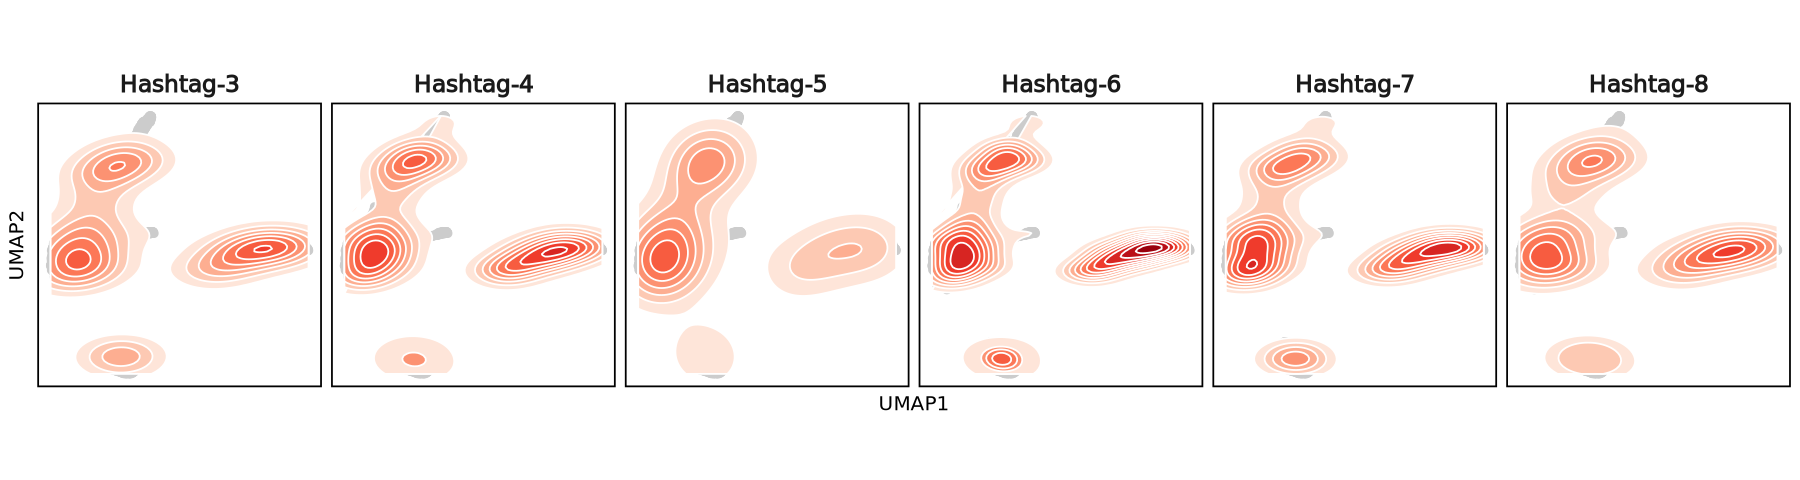

In [354]:
options(repr.plot.width=15, repr.plot.height=4)
scDensityUMAP(obj, split.by = "MULTI_ID", reduction = "umap", adjust = 1.2)

## Find Louvain Clusters

In [327]:
obj <- FindNeighbors(obj, reduction = "harmony", dims = 1:10, verbose = F)
obj <- FindClusters(obj, resolution = seq(0.1, 1, 0.1), algorithm = 1, verbose = F)
clustree <- clustree(obj@meta.data, prefix = paste0("SCT_snn_res."))

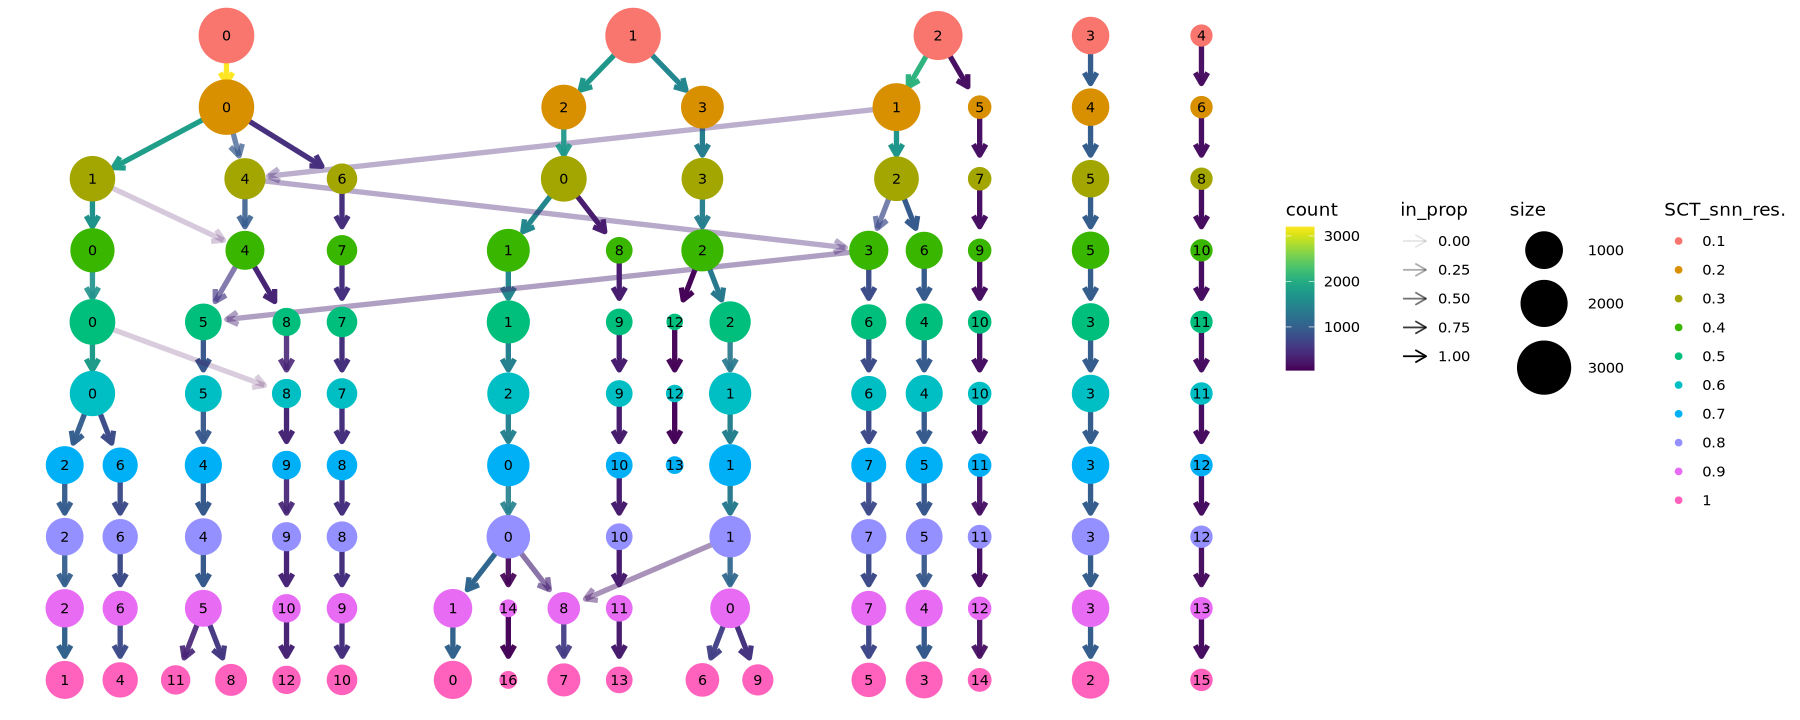

In [332]:
options(repr.plot.width=15, repr.plot.height=6)
print(clustree + 
  theme(legend.box = "horizontal"))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


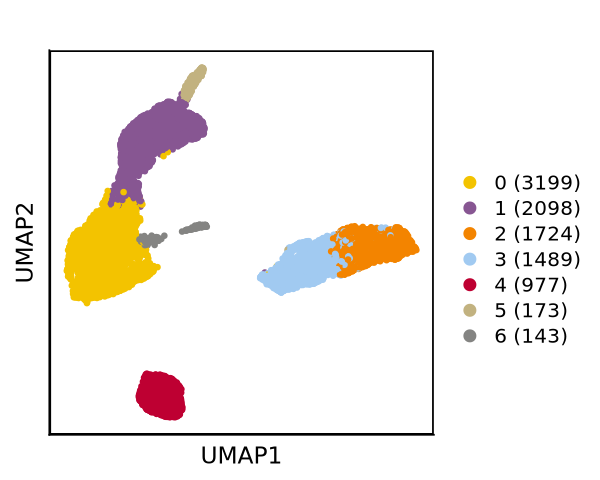

In [329]:
options(repr.plot.width=5, repr.plot.height=4)
scUMAP(obj, reduction = "umap", group.by = "SCT_snn_res.0.2", count = T, pt.size = 1.2, cols = kelly, shuffle = F)

In [330]:
for(a in names(obj@assays)){
    if(a %in% c("RNA", "BCR", "TCR", "CC")){
        obj[[a]] <- JoinLayers(obj[[a]])}}

In [333]:
for(a in names(obj@assays)){
    if(a %in% c("BCR", "TCR", "CC")){
        obj <- return_genes(obj, from_assay = a, to_assay = "RNA")}}

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”


Warning message in brewer.pal(12, "RdBu"):
“n too large, allowed maximum for palette RdBu is 11
Returning the palette you asked for with that many colors
”


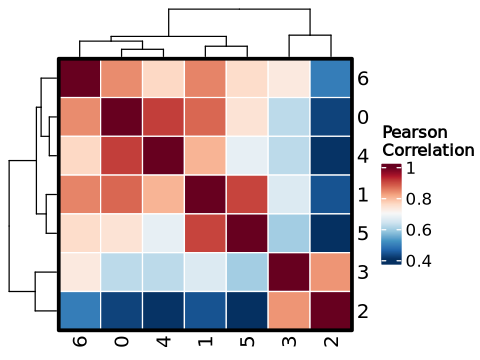

In [346]:
options(repr.plot.width=4, repr.plot.height=3)
pearson <- calculate_cluster_similarity(obj, cluster = "SCT_snn_res.0.2", variable.features = T)
plot_similarity_heatmap(pearson)

## Session Info

In [ ]:
qsave()

In [377]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /nemo/lab/caladod/working/Matthew/.conda/envs/seurat5/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/London
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scDblFinder_1.14.0          DoubletFinder_2.0.4        
 [3] BiocParallel_1.36.0         harmony_1.1.0              
 [5] Rcpp_1.0.11                 qs_0.26.3    